In [1]:
from classes import *
import matplotlib.pyplot as plt
%matplotlib inline

# Initial conditions from JPL 

### all distance units in km and velocity units in km/s, mass units vary

Queried by emailing horizons@ssd.jpl.nasa.gov with subject "job" the following request:

```
!$$SOF
EMAIL_ADDR=''
START_TIME = '2022-Apr-13 17:30:58'
STOP_TIME = '2022-Apr-13 17:30:59'
TABLE_TYPE = 'Vector'
REF_PLANE = 'Ecliptic'
CENTER = '@010'
COMMAND='301'
!$$EOF
```

Mercury:

```
M = 3.302e23 #kg
X = 1.110916522416601E+07 Y = 4.456502192800377E+07 Z = 2.622796241814205E+06
VX=-5.703123252749995E+01 VY= 1.360575354330767E+01 VZ= 6.343141260792535E+00
```

Venus:

```
M = 48.685e23 #kg
X =-1.685999489592930E+07 Y =-1.073561728379369E+08 Z =-5.008626878213733E+05
VX= 3.436102904544547E+01 VY=-5.570939237868072E+00 VZ=-2.059193547426377E+00
```

Earth:

```
M = 5.97219e24 #kg
X =-1.375940484201103E+08 Y =-5.973356070238715E+07 Z = 3.341256767742336E+03
VX= 1.138018853204673E+01 VY=-2.742657233215114E+01 VZ= 1.794471937204278E-03
```

Mars:

```
M = 6.4171e23 #kg
X = 8.326312182122111E+07 Y =-1.943230264691119E+08 Z =-6.115007548223168E+06
VX= 2.318369615348105E+01 VY= 1.162528978143095E+01 VZ=-3.250528802125325E-01
```

Jupiter:

```
M = 189818722e22 #g
X = 7.282521894498440E+08 Y =-1.517769651346686E+08 Z =-1.566297396312387E+07
VX= 2.514748118534514E+00 VY= 1.341743454844018E+01 VZ=-1.120004705171809E-01
```

Saturn:

```
M = 5.6834e26 #kg
X = 1.095863183289656E+09 Y =-9.953880718607991E+08 Z =-2.630526545470560E+07
VX= 5.959615882134208E+00 VY= 7.143361101105267E+00 VZ=-3.612073056588807E-01
```

Uranus:

```
M = 86.813e24 #kg
X = 2.111689696826417E+09 Y = 2.057397883207691E+09 Z =-1.972550577604270E+07
VX=-4.800186215060698E+00 VY= 4.573813933558258E+00 VZ= 7.933505399390306E-02
```

Neptune: 

```
M = 102.409e24 #kg
X = 4.439132485644518E+09 Y =-5.637062255266192E+08 Z =-9.070086098693353E+07
VX= 6.528361698129778E-01 VY= 5.438988775158588E+00 VZ=-1.275723903735155E-01
```

Pluto:

```
M = 1.307e22 #kg
X = 2.307391067267994E+09 Y =-4.613744198897101E+09 Z =-1.734198481725609E+08
VX= 5.001718539881353E+00 VY= 1.258125710263582E+00 VZ=-1.600774448139200E+00
```

Earth moon:

```
M = 7.349e22 #kg
X =-1.379634997099019E+08 Y =-5.963097428487568E+07 Z = 3.578340428863466E+04
VX= 1.116388048860595E+01 VY=-2.842573474304141E+01 VZ=-3.799771522660755E-02
```








In [2]:
#set things up from JPL data above
AU = 1.5e11; Msun = 1.9885e30; yearSec = 365*24*3600
Mercury = body(np.array([1.110916522416601e7,4.456502192800377e7,2.622796241814205e6])*1e3,np.array([-5.703123252749995e1,1.360575354330767e1,6.343141260792535])*1e3,3.302e23)
Venus = body(np.array([-1.685999489592930e7,-1.073561728379369e8,-5.008626878213733e5])*1e3,np.array([3.436102904544547E+01,-5.570939237868072E+00,-2.059193547426377E+00])*1e3,48.685e23)
Earth = body(np.array([-1.375940484201103E+08,-5.973356070238715E+07,3.341256767742336E+03])*1e3,np.array([1.138018853204673E+01,-2.742657233215114E+01,1.794471937204278E-03])*1e3,5.97219e24)
Mars = body(np.array([8.326312182122111E+07,-1.943230264691119E+08,-6.115007548223168E+06])*1e3,np.array([2.318369615348105E+01,1.162528978143095E+01,-3.250528802125325E-01])*1e3,6.4171e23)
Jupiter = body(np.array([7.282521894498440E+08,-1.517769651346686E+08,-1.566297396312387E+07])*1e3,np.array([2.514748118534514E+00,1.341743454844018E+01,-1.120004705171809E-01])*1e3,189818722e22/1e3)
Saturn = body(np.array([1.095863183289656E+09,-9.953880718607991E+08,-2.630526545470560E+07])*1e3,np.array([5.959615882134208E+00,7.143361101105267E+00,-3.612073056588807E-01])*1e3,5.6834e26)
Uranus = body(np.array([2.111689696826417E+09,2.057397883207691E+09,-1.972550577604270E+07])*1e3,np.array([-4.800186215060698E+00,4.573813933558258E+00,7.933505399390306E-02])*1e3,86.813e24)
Neptune = body(np.array([4.439132485644518E+09,-5.637062255266192E+08,-9.070086098693353E+07])*1e3,np.array([6.528361698129778E-01,5.438988775158588E+00,-1.275723903735155E-01])*1e3,102.409e24)
Pluto = body(np.array([2.307391067267994E+09,-4.613744198897101E+09,-1.734198481725609E+08])*1e3,np.array([5.001718539881353E+00,1.258125710263582E+00,-1.600774448139200E+00])*1e3,1.307e22)
Moon = body(np.array([-1.379634997099019E+08,-5.963097428487568E+07,3.578340428863466E+04])*1e3,np.array([1.116388048860595E+01,-2.842573474304141E+01,-3.799771522660755E-02])*1e3,7.349e22)
Sun = body([0.,0.,0.,],[0.,0.,0.,],Msun)

In [4]:
import sys
def trackCompletion(place,stop,strLen): 
    """
    progress logger for simulations
    params: place: current time / place in simulation; stop: final time / place in simulation; strLen: the length of previously printed string
    returns: strLen: the length of currently printed string
    """
    string="Currently at T = {0:.2f} / {1:.2f} years".format(place,stop)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

def getPlotData(system,cadence=1e-3,stopT=1,yrErr=1e-3,integrator="RK4"):
    """
    Given a system, this function simulates it for the specified amount of total time and returns points we can use to plot!
    params: system: object generated from system class, a collection of n-bodies; cadence: how often we should store data for plotting/analysis, units of years, defaults to 1e-3 years;
            stopT: the total time we want to simulate, units of years, defaults to 1 year; yrErr: the maximum acceptable error per year, if using non-relativistic adaptive timestep, defaults to 1e-3;
            integrator: the integrator to use, defaults to RK4
    returns: system: the end state of the n-body system after being evolved; t: the array of output times; x,y,z: the array of output x,y,z positions, of shape (nBodies,len(t))
    """
    strLen = 0; oldT = 0; place = 0
    x = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    y = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    z = np.zeros((system.nBodies,int(np.round(stopT/cadence))))
    t = np.zeros(int(np.round(stopT/cadence)))
    while system.T < stopT:
        system.update(yrErr=yrErr,integrator=integrator)
        #system.bodies[0].pos = coords(0.,0.,0.) #keep the Sun from moving
        #system.bodies[0].v = velocities(0.,0.,0.)
        if system.T-oldT > cadence:
            strLen = trackCompletion(system.T,stopT,strLen)
            oldT = system.T
            xtmp,ytmp,ztmp,vx,vy,vz = system.getCoords()
            x[:,place] = xtmp
            y[:,place] = ytmp
            z[:,place] = ztmp
            t[place] = system.T
            place += 1

    return system,t[0:place],x[:,0:place],y[:,0:place],z[:,0:place]



In [6]:
solarSystem = system([Sun,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto,Moon],Δt=yearSec/1e3,massiveInd=0,closeInds=[1])
endState,t,x,y,z = getPlotData(solarSystem,stopT=2) #let's do a test for 2 years 

Currently at T = 2.00 / 2.00 years

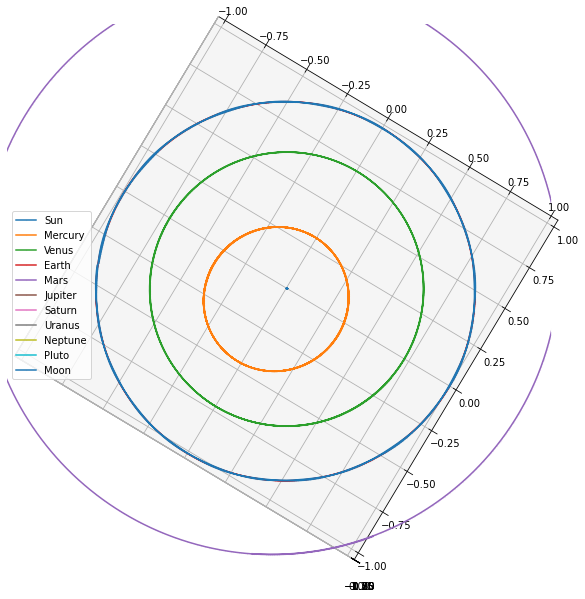

In [7]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
for i in range(solarSystem.nBodies):
    ax.plot3D(x[i,:]/AU,y[i,:]/AU,z[i,:]/AU,label=labels[i],marker=".",ms=0.1)

ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=90.)
boxSize = 1
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.legend()
#looks good!

In [46]:
MP = 87.96926/365*yearSec #orbital period of Mercury in s
solarSystem = system([Sun,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto],Δt=MP/1e3,massiveInd=0,closeInds=[1])

endStateM,tM,xM,yM,zM = getPlotData(solarSystem,stopT=250,cadence=1e-3) #go for 250 years so we capture even Pluto's orbit

Currently at T = 26.43 / 250.00 years

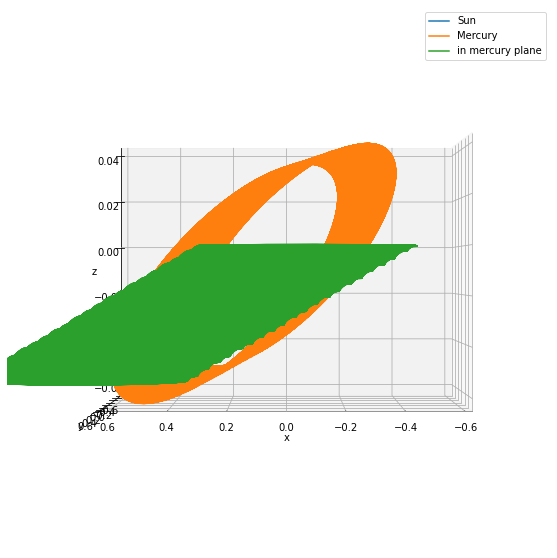

In [44]:
#proof of concept showing that we can go to Mercury orbital plane

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
φ = 48.331/180*np.pi #deg to rad, longitude of ascending node
θ = 7.005/180*np.pi #deg to rad, inclination relative to ecliptic
ψ = 29.124/180*np.pi #deg to rad, argument of periapsis

a11 = np.cos(ψ)*np.cos(φ)-np.cos(θ)*np.sin(φ)*np.sin(ψ)
a12 = np.cos(ψ)*np.sin(φ)+np.cos(θ)*np.cos(φ)*np.sin(ψ)
a13 = np.sin(ψ)*np.sin(θ)
a21 = -np.sin(ψ)*np.cos(φ)-np.cos(θ)*np.sin(φ)*np.cos(ψ)
a22 = -np.sin(ψ)*np.sin(φ)+np.cos(θ)*np.cos(φ)*np.cos(ψ)
a23 = np.cos(ψ)*np.sin(θ)
a31 = np.sin(θ)*np.sin(φ)
a32 = -np.sin(θ)*np.cos(φ)
a33 = np.cos(θ)

xnew = a11*xM+a12*yM+a13*zM
ynew = a21*xM+a22*yM+a23*zM
znew = a31*xM+a32*yM+a33*zM

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
labels = ["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune","Pluto","Moon"]
for i in range(2):
    ax.plot3D(xM[i,:]/AU,yM[i,:]/AU,zM[i,:]/AU,label=labels[i],marker=".",ms=0.1)
    if i >0:
        ax.plot3D(xnew[i,:]/AU,ynew[i,:]/AU,znew[i,:]/AU,label="in mercury plane")
#ax.set_box_aspect((np.ptp(x[-1,:]), np.ptp(y[-1,:]), np.ptp(z[-1,:])))  # aspect ratio is 1:1:1 in data space
ax.view_init(elev=0.,azim=90.)
boxSize = 0.6
ax.set_xlim3d((-boxSize,boxSize)); ax.set_ylim3d((-boxSize,boxSize))
ax.set_xlabel("x");ax.set_ylabel("y");ax.set_zlabel("z")
ax.legend()
# plt.xlim(5.3e10,5.4e10)
# plt.ylim(-2e10,0)# 

In [23]:
from scipy.signal import find_peaks

def calcPrecession(plotData,bodyInd=1,height=0.05,width=50): #height threshold in AU
    """
    This function finds the places of perihelion for a given orbital body from the orbital system data and returns the angles at which the perihelion occurs.
    takes in plotData (which contains time, x, y, z information for system), the index of the body we want to calculate precession on (defaults to 1 for Mercury),
    height of peaks (in AU) required (difference from mean distance, defaults to 0.05), and the width of a peak (defaults to 50 cells)
    returns: a: an array of perihelion distances; φ: the angles at which these perihelions occurred; tP: the system times at which each perihelion happened
    """
    AU=1.495978707e11
    t,x,y,z = plotData
    φ = 48.331/180*np.pi #deg to rad, longitude of ascending node
    θ = 7.005/180*np.pi #deg to rad, inclination relative to ecliptic
    ψ = 29.124/180*np.pi #deg to rad, argument of periapsis

    a11 = np.cos(ψ)*np.cos(φ)-np.cos(θ)*np.sin(φ)*np.sin(ψ)
    a12 = np.cos(ψ)*np.sin(φ)+np.cos(θ)*np.cos(φ)*np.sin(ψ)
    a13 = np.sin(ψ)*np.sin(θ)
    a21 = -np.sin(ψ)*np.cos(φ)-np.cos(θ)*np.sin(φ)*np.cos(ψ)
    a22 = -np.sin(ψ)*np.sin(φ)+np.cos(θ)*np.cos(φ)*np.cos(ψ)
    a23 = np.cos(ψ)*np.sin(θ)
    a31 = np.sin(θ)*np.sin(φ)
    a32 = -np.sin(θ)*np.cos(φ)
    a33 = np.cos(θ)

    #transform orbit to be in orbital plane of Mercury instead of ecliptic
    xnew = a11*xM+a12*yM+a13*zM
    ynew = a21*xM+a22*yM+a23*zM
    znew = a31*xM+a32*yM+a33*zM #this should now be basically zero
    r = np.sqrt((xnew[bodyInd,:]-xnew[0,:])**2+(ynew[bodyInd,:]-ynew[0,:])**2)/AU #Sun fixed at 0, z ~ 0
    peaks, properties = find_peaks((r-np.mean(r))*-1,height=height,width=width)
    φ = np.arctan2(ynew[bodyInd,:][peaks],xnew[bodyInd,:][peaks])
    a = r[peaks]
    tP = t[peaks]
    return a,φ,tP


Text(0.5, 1.0, 'y = -7.1e-06x + -0.035')

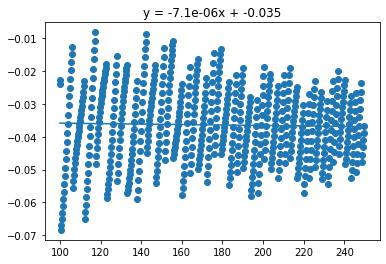

In [45]:
#calculating precession
from scipy.optimize import curve_fit
a,φ,tP = calcPrecession([tM,xM,yM,zM],width=10)
cut = 100
plt.scatter(tP[tP>cut],φ[tP>cut])
def f(x,m,b):
    return m*x + b
fit,cov = curve_fit(f,tP[tP>cut],φ[tP>cut])
plt.plot(tP[tP>cut],f(tP[tP>cut],*fit))
plt.title("y = {0:.2g}x + {1:.2g}".format(*fit))

In [33]:
pPerYear = (φ[-1]-φ[0])/tP[-1]
theory = 2.08469883e-6 #rad/year = 0.43 "/century
print(pPerYear)

7.403546738590617e-05
